In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

torch.manual_seed(1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


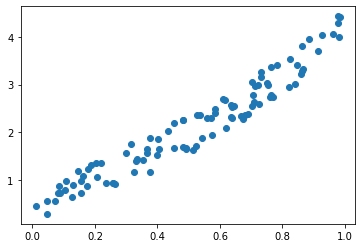

In [196]:
# Visualize our data
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(100)
y = np.sin(x) * np.power(x,3) + 3*x + np.random.rand(100)*0.8

# convert numpy array to tensor in shape of input size
x = torch.from_numpy(x.reshape(-1,1)).float()
y = torch.from_numpy(y.reshape(-1,1)).float()

plt.scatter(x, y)
plt.show()

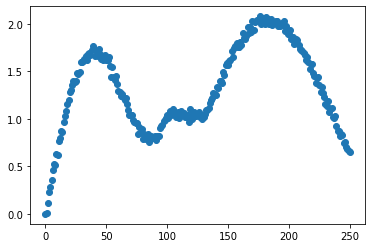

In [191]:
X1 = np.linspace(0,100,101)
X2 = np.linspace(101,130,30)
X3 = np.linspace(131,250,120)

Y1 = np.sin(0.05*X1) + 0.02*X1
Y2 = np.repeat(Y1[-1], 30) 
Y3 = Y1[-1] + np.sin(0.03*(X3-X3[0]))

#noise = np.random.normal()

X = np.concatenate([X1, X2, X3])
noise = np.random.normal(0, 0.03, len(X))
Y = np.concatenate([Y1, Y2, Y3]) + noise

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

# convert numpy array to tensor in shape of input size
x = torch.from_numpy(X_train.reshape(-1,1)).float()
y = torch.from_numpy(y_train.reshape(-1,1)).float()

plt.scatter(X,Y)

In [213]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class Net(nn.Module):
   def __init__(self):
       super(Net, self).__init__()
       self.layer_1 = torch.nn.Linear(1, 4)
       self.layer_3 = torch.nn.Linear(4, 1)

   def forward(self, x):
       x = self.layer_1(x)
       x = self.layer_2(x)
       x = self.layer_3(x)    
       return x

net = Net()
print(net)


Net(
  (layer_1): Linear(in_features=1, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
)


In [214]:
# Define Optimizer and Loss Function
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()

In [215]:
inputs = Variable(x)
outputs = Variable(y)
for i in range(250):
   prediction = net(inputs)
   loss = loss_func(prediction, outputs) 
   optimizer.zero_grad()
   loss.backward()        
   optimizer.step()       

   if i % 10 == 0:
       # plot and show learning process
       plt.cla()
       plt.scatter(x.data.numpy(), y.data.numpy())
       plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
       plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
       plt.pause(0.1)

plt.show()

AttributeError: 'Net' object has no attribute 'layer_2'